In [60]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import re

In [34]:
class Patch(object):
    pattern = re.compile(r"""#(\d+) @ (\d+),(\d+): (\d+)x(\d+)""")
        
    def __init__(self, i, x, y, dx, dy):
        self.i = i
        self.x = x
        self.y = y
        self.dx = dx
        self.dy = dy

    def __repr__(self):
        return "Patch(i=%d x=%d y=%d dx=%d dy=%d)" % (self.i, self.x, self.y, self.dx, self.dy)
        
    @staticmethod
    def parse(s):
        m = Patch.pattern.match(s)
        if m:
            i = int(m.group(1))
            x = int(m.group(2))
            y = int(m.group(3))
            dx = int(m.group(4))
            dy = int(m.group(5))
            return Patch(i, x, y, dx, dy)
        else:
            return None
        
print(Patch.parse("#1 @ 1,3: 4x4"))

Patch(i=1 x=1 y=3 dx=4 dy=4)


Patch(i=1 x=1 y=3 dx=4 dy=4)
Patch(i=2 x=3 y=1 dx=4 dy=4)
Patch(i=3 x=5 y=5 dx=2 dy=2)


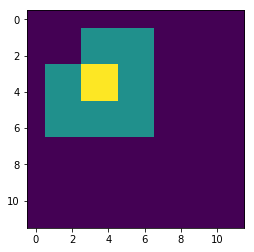

In [47]:
test = [
    "#1 @ 1,3: 4x4",
    "#2 @ 3,1: 4x4",
    "#3 @ 5,5: 2x2"
]

d=np.zeros((12, 12), dtype=int)

for t in [Patch.parse(s) for s in test]:
    print(t)
    d[t.y:t.y+t.dy,t.x:t.x+t.dx] += 1
    #print(d)
    
plt.imshow(d)

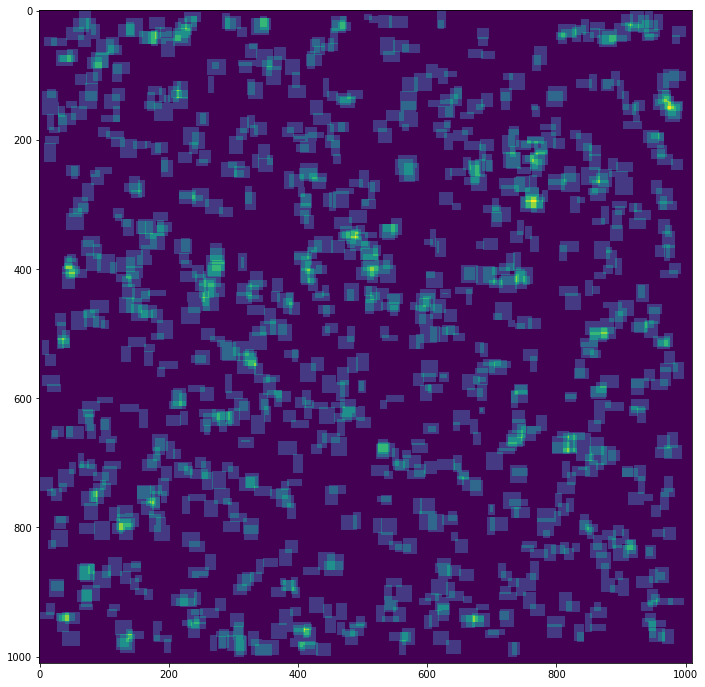

In [69]:
d2 = np.zeros((1010, 1010), dtype=int)

with open("input.txt", "r") as f:
    for line in f:
        p = Patch.parse(line)
        d2[p.y:p.y+p.dy,p.x:p.x+p.dx] += 1 

fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(d2)

In [53]:
(d2 > 1).sum()

109143

In [67]:
with open("input.txt", "r") as f:
    for line in f:
        p = Patch.parse(line)
        dsub = d2[p.y:p.y+p.dy,p.x:p.x+p.dx]
        area = p.dx * p.dy
        area1 = (dsub == 1).sum()
        if area == area1:
            print ("%s - size: %d ones: %d" % (p, area, area1))

Patch(i=506 x=261 y=102 dx=10 dy=27) - size: 270 ones: 270
